# 1. Goodbooks-10k 
- Link : https://www.kaggle.com/zygmunt/goodbooks-10k

In [78]:
import pandas as pd
import numpy as np
import plotnine 
from plotnine import *
import os, sys, gc
from tqdm.notebook import tqdm

In [2]:
path = './input/books/'
print(os.listdir(path))

['books.csv', 'book_tags.csv', 'ratings.csv', 'sample_book.xml', 'tags.csv', 'to_read.csv']


- books.csv : 책의 메타정보 
- book_tags.csv : 책-테그의 매핑정보 
- ratings.csv : 사용자가 책에 대해 점수를 준 평점정보 
- tags.csv : 테그의 정보 
- to_read.csv : 사용자가 읽으려고 기록해둔 책 (장바구니) 

In [20]:
books = pd.read_csv(path + "books.csv")
book_tags = pd.read_csv(path + "book_tags.csv")
ratings = pd.read_csv(path + "ratings.csv")
tags = pd.read_csv(path + "tags.csv")
to_read = pd.read_csv(path + "to_read.csv")

## books의 메타정보 확인 

In [21]:
books.head()

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


In [22]:
books.columns

Index(['id', 'book_id', 'best_book_id', 'work_id', 'books_count', 'isbn',
       'isbn13', 'authors', 'original_publication_year', 'original_title',
       'title', 'language_code', 'average_rating', 'ratings_count',
       'work_ratings_count', 'work_text_reviews_count', 'ratings_1',
       'ratings_2', 'ratings_3', 'ratings_4', 'ratings_5', 'image_url',
       'small_image_url'],
      dtype='object')

In [23]:
# 필요한 변수들만 사용 
books = books[['book_id', 'authors', 'title', 'average_rating', 'language_code']].reset_index(drop=True)

- 추후에는 image_url과 같이 이미지 정보를 활용하는 방법이 있습니다. 

In [25]:
print("책의 숫자:", books['book_id'].nunique())
print("저자의 숫자:", books['authors'].nunique())
print("책의 평균 평점:", books['average_rating'].mean())

책의 숫자: 10000
저자의 숫자: 4664
책의 평균 평점: 4.002191000000001


In [26]:
books.isnull().sum()

book_id              0
authors              0
title                0
average_rating       0
language_code     1084
dtype: int64

In [27]:
books['authors'].value_counts()

Stephen King                                    60
Nora Roberts                                    59
Dean Koontz                                     47
Terry Pratchett                                 42
Agatha Christie                                 39
                                                ..
Philip José Farmer                               1
Dot Hutchison                                    1
William S. Baring-Gould                          1
Joseph Kesselring                                1
William Blake, David V. Erdman, Harold Bloom     1
Name: authors, Length: 4664, dtype: int64

In [29]:
books.sort_values(by='average_rating', ascending=False).head()

,book_id,authors,title,average_rating,language_code
3627,24812,Bill Watterson,The Complete Calvin and Hobbes,4.82,eng
3274,8,"J.K. Rowling, Mary GrandPré","Harry Potter Boxed Set, Books 1-5 (Harry Potte...",4.77,eng
861,17332218,Brandon Sanderson,"Words of Radiance (The Stormlight Archive, #2)",4.77,eng
8853,95602,Francine Rivers,Mark of the Lion Trilogy,4.76,en-US
7946,5031805,"Anonymous, Lane T. Dennis, Wayne A. Grudem",ESV Study Bible,4.76,eng


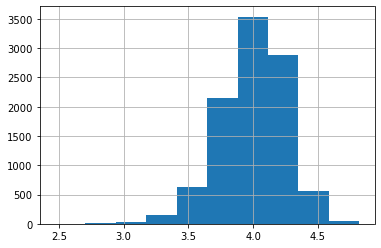

In [43]:
books['average_rating'].hist()

In [44]:
books['language_code'].unique()

array(['eng', 'en-US', 'en-CA', nan, 'spa', 'en-GB', 'fre', 'nl', 'ara',
       'por', 'ger', 'nor', 'jpn', 'en', 'vie', 'ind', 'pol', 'tur',
       'dan', 'fil', 'ita', 'per', 'swe', 'rum', 'mul', 'rus'],
      dtype=object)

- 국적에 맞는 책을 추천해주는게 필요 

## book의 tag 정보 확인

In [45]:
book_tags.head()

,goodreads_book_id,tag_id,count
0,1,30574,167697
1,1,11305,37174
2,1,11557,34173
3,1,8717,12986
4,1,33114,12716


In [46]:
tags.head()

,tag_id,tag_name
0,0,-
1,1,--1-
2,2,--10-
3,3,--12-
4,4,--122-


In [49]:
tags['tag_name'].unique()[30:50]

array(['-gr-', '-history', '-imaginary', '-italy-', '-la--', '-los',
       '-mass--', '-murder-', '-n-y--', '-non-poetry-', '-performing',
       '-post', '-psychology-', '-read', '-single', '-specific',
       '-television', '0', '0-0-0-0cant-find', '0-0-bingo'], dtype=object)

In [72]:
agg = book_tags.groupby(['tag_id'])['count'].agg({'sum'}).reset_index()
agg = agg.sort_values(by='sum', ascending=False)
agg

,tag_id,sum
30574,30574,140718761
8717,8717,7507958
11557,11557,4503173
11743,11743,3688819
11305,11305,3548157
...,...,...
2278,2278,1
7820,7820,1
23158,23158,1
2272,2272,-1


In [73]:
tags[tags['tag_id'].isin(agg['tag_id'].values[0:5])]

,tag_id,tag_name
8717,8717,currently-reading
11305,11305,fantasy
11557,11557,favorites
11743,11743,fiction
30574,30574,to-read


- 태그정보를 통해서 내가 보는 태그의 글을 추천해주는 것도 중요 (성향파악) 

## ratings 평점정보 확인

In [51]:
ratings.head()

,book_id,user_id,rating
0,1,314,5
1,1,439,3
2,1,588,5
3,1,1169,4
4,1,1185,4


In [52]:
print(ratings['book_id'].nunique())
print(ratings['user_id'].nunique())
print(ratings['rating'].mean())

10000
53424
3.8565335989797873


In [53]:
ratings['book_id'].value_counts()

2047    100
5308    100
7358    100
5311    100
3772    100
       ... 
9315     36
1935     34
9486     24
9345     11
7803      8
Name: book_id, Length: 10000, dtype: int64

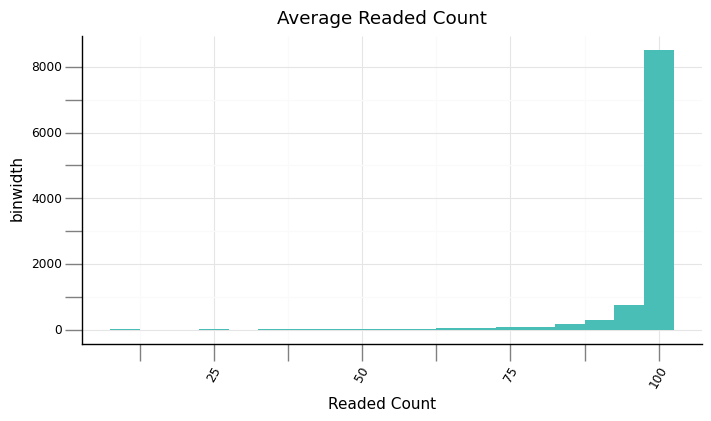

<ggplot: (155936734019)>

In [58]:
agg = ratings.groupby(['book_id'])['book_id'].agg({'count'}).reset_index()
(ggplot(data=agg)
    + geom_histogram(aes(x='count', y='stat(count)'), fill = '#49beb7', binwidth=5)
    + theme_minimal()
    + ggtitle("Average Readed Count")
    + labs(x="Readed Count", y="binwidth") 
    + theme(
         axis_text_x = element_text(angle=60, color='black'),
         axis_text_y = element_text(color='black'),
         axis_line=element_line(color="black"),
         axis_ticks=element_line(color = "grey"),
         figure_size=(8,4))    
)

In [54]:
ratings['user_id'].value_counts()

12874    200
30944    200
52036    199
28158    199
12381    199
        ... 
9417       2
33501      2
35548      2
41689      2
2049       2
Name: user_id, Length: 53424, dtype: int64

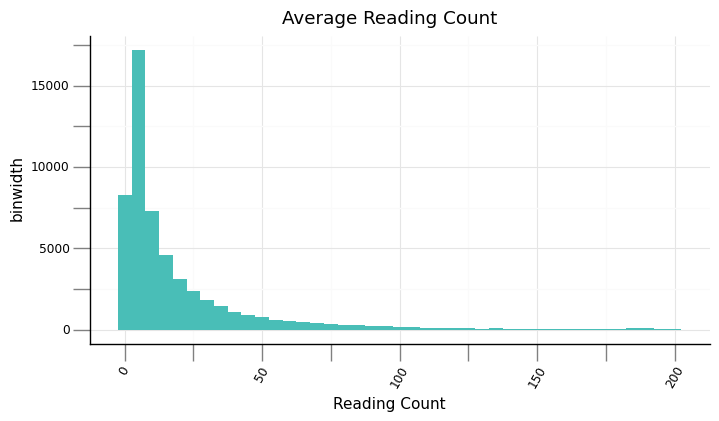

<ggplot: (155936780746)>

In [59]:
agg = ratings.groupby(['user_id'])['user_id'].agg({'count'}).reset_index()
(ggplot(data=agg)
    + geom_histogram(aes(x='count', y='stat(count)'), fill = '#49beb7', binwidth=5)
    + theme_minimal()
    + ggtitle("Average Reading Count")
    + labs(x="Reading Count", y="binwidth") 
    + theme(
         axis_text_x = element_text(angle=60, color='black'),
         axis_text_y = element_text(color='black'),
         axis_line=element_line(color="black"),
         axis_ticks=element_line(color = "grey"),
         figure_size=(8,4))    
)

## to read 정보

In [60]:
to_read.head()

,user_id,book_id
0,1,112
1,1,235
2,1,533
3,1,1198
4,1,1874


In [61]:
to_read['user_id'].nunique()

48871

## 학습셋과 검증셋 생성

In [74]:
agg = ratings.groupby(['user_id'])['book_id'].agg({'unique'}).reset_index()
agg.head()

,user_id,unique
0,1,"[1180, 4893, 6285]"
1,2,"[8034, 8855, 9762]"
2,3,"[9014, 9049]"
3,4,"[3273, 3469, 8464]"
4,5,"[4829, 6646, 6703, 7487, 8072]"


In [76]:
agg['train'] = agg['unique'].apply(lambda x: np.random.choice(x, len(x)//2))
agg.head()

,user_id,unique,train
0,1,"[1180, 4893, 6285]",[4893]
1,2,"[8034, 8855, 9762]",[8855]
2,3,"[9014, 9049]",[9049]
3,4,"[3273, 3469, 8464]",[3273]
4,5,"[4829, 6646, 6703, 7487, 8072]","[4829, 6703]"


In [80]:
test = []
for i in tqdm(range(0, agg.shape[0])):
    test_rec = list(set(agg.loc[i, 'unique']).difference(set(agg.loc[i, 'train'])))
    test.append(test_rec)
agg['test'] = test

In [84]:
# train dataset 
train_map = agg[['user_id', 'train']]

# unnest tags
train_map_unnest = np.dstack(
    (
        np.repeat(train_map.user_id.values, list(map(len, train_map.train))), 
        np.concatenate(train_map.train.values)
    )
)

train_map_unnest = pd.DataFrame(data = train_map_unnest[0], columns = train_map.columns)
train_map_unnest.head()

,user_id,train
0,1,4893
1,2,8855
2,3,9049
3,4,3273
4,5,4829


In [85]:
# test dataset 
test_map = agg[['user_id', 'test']]

# unnest tags
test_map_unnest = np.dstack(
    (
        np.repeat(test_map.user_id.values, list(map(len, test_map.test))), 
        np.concatenate(test_map.test.values)
    )
)

test_map_unnest = pd.DataFrame(data = test_map_unnest[0], columns = test_map.columns)
test_map_unnest.head()

,user_id,test
0,1,1180
1,1,6285
2,2,8034
3,2,9762
4,3,9014


In [86]:
train_map_unnest.columns = ['user_id', 'book_id']
test_map_unnest.columns = ['user_id', 'book_id']
train_map_unnest.to_csv("train.csv", index=False)
test_map_unnest.to_csv("test.csv", index=False)

## 정리
- 전체 책을 구매한 사용자는 53424명이고 책의 개수는 10000개 
- 그 중 48871명이 장바구니에 책을 담아두었습니다. 
- 평균적으로 작가당 책이 2권 이상은 됩니다. 